In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
from lfm_flow.mogaussianprocesses import MultioutputGaussianProcess
from lfm_flow.kernels import LFM1_RBF
import matplotlib.pyplot as plt


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [2]:
def reset_session():
  """Creates a new global, interactive session in Graph-mode."""
  global sess
  try:
    tf.reset_default_graph()
    sess.close()
  except:
    pass
  sess = tf.InteractiveSession()

reset_session()

In [3]:
K = 2. # Dimension of state variable
R = 1. # Number of latent forces

N1 = 17 # no. of obs from x1(t)
N2 = 10 # no. of obs from x2(t)

D = tf.get_variable(name='D', shape=(K, ), dtype=np.float64)
S = tf.get_variable(name='S', shape=(K, R), dtype=np.float64)
lf_length_scales = [1.15]

kern = LFM1_RBF(D, S, lf_length_scales)

index_points_dim1 = tf.placeholder(name='index_points_t1', shape=(N1, 1), dtype=np.float64)
index_points_dim2 = tf.placeholder(name='index_points_t2', shape=(N2, 1), dtype=np.float64)
index_points = [index_points_dim1, index_points_dim2]

lfm = MultioutputGaussianProcess(kern, index_points, jitter=1e-4)

rv = lfm.sample(8)

rv = tf.split(rv,
              [N1, N2],
              axis=-1)


Instructions for updating:
Colocations handled automatically by placer.


In [4]:

sess.run(tf.global_variables_initializer())

t1 = np.linspace(0.01, 3., N1)
t2 = np.linspace(0.01, 3., N2)

feed_dict = {D : [0.5, 1.],
             index_points_dim1: t1[:, None], 
             index_points_dim2: t2[:, None]}

rv = sess.run(rv, feed_dict = feed_dict)

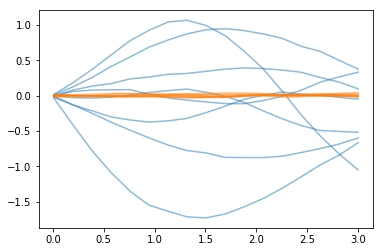

In [5]:
fig, ax = plt.subplots()
ax.plot(t1, rv[0].T, 'C0-', alpha=0.5)
ax.plot(t2, rv[1].T, 'C1-', alpha=0.5)

plt.show()

In [7]:
from lfm_flow.mogaussianprocesses import MultioutputGaussianProcessRegressionModel

In [8]:
from lfm_flow.mogaussianprocesses import MultioutputGaussianProcessRegressionModel
Y = tf.placeholder(name='Y', dtype=np.float64, shape=(N1+N2, ))
predict_index_points = [ttd, ttd]

gprm = MultioutputGaussianProcessRegressionModel(
    kern,
    index_points=predict_index_points,
    observation_index_points=index_points,
    observations=Y)

NameError: name 'ttd' is not defined